In [1]:
# !pip install tensorflow

In [2]:
from PIL import Image
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 128x128 사이즈로 바꾸어 저장합니다.
	target_size=(128,128)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

0  images to be resized.
0  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

0  images to be resized.
0  images resized.
바위 이미지 resize 완료!


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

0  images to be resized.
0  images resized.
보 이미지 resize 완료!


In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

def load_data(img_path, number_of_data=2254):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=128
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = Image.open(file).resize((128, 128))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = Image.open(file).resize((128, 128))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = Image.open(file).resize((128, 128))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "dataset" #폴더명
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2254 입니다.
x_train shape: (2254, 128, 128, 3)
y_train shape: (2254,)


라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0
라벨 :  0


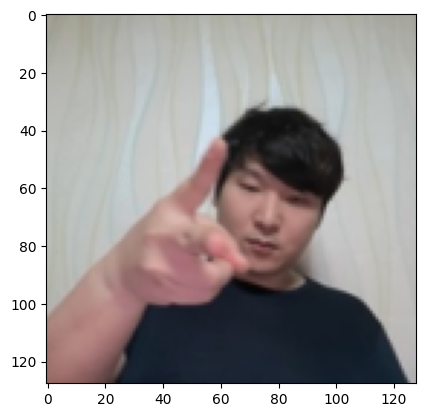

In [16]:
for i in range(100):
    plt.imshow(x_train[i])
    print('라벨 : ', y_train[i])

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

model.summary()

c:\Users\zqrc0\anaconda3\envs\motionpy310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,394,900 (28.21 MB)

 Trainable params: 7,394,900 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=3)

Epoch 1/3
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6002 - loss: 1.2754
Epoch 2/3
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9854 - loss: 0.0504
Epoch 3/3
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9976 - loss: 0.0108


In [10]:
image_dir_path = "dataset/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0

print("x_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 328 입니다.
x_test shape : (2254, 128, 128, 3)
y_test shape : (2254,)


In [11]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

71/71 - 1s - 17ms/step - accuracy: 0.0515 - loss: 5.3735
test_loss : 5.373485088348389
test_accuracy : 0.05146406218409538


In [12]:
predicted_result = model.predict(x_test_norm)	# model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=100		# 값을 변경해서 찾아보자
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
model.predict() 결과 :  [1.46022514e-02 9.74546075e-01 1.08517092e-02 4.72182926e-12
 6.19702423e-09 1.30536363e-11 1.83335586e-11 5.14762157e-11
 1.72774434e-10 4.29174491e-12 5.66621139e-10 1.55812058e-10
 3.11162589e-11 1.41767795e-11 3.37360945e-10 1.63160024e-11
 4.50620918e-09 6.58061294e-09 1.10194492e-11 1.92311861e-11]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


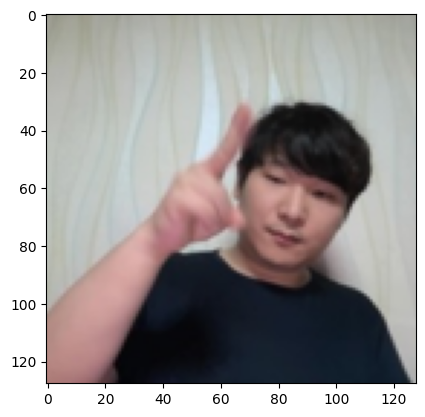

In [13]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

예측확률분포: [3.0431519e-03 9.9220575e-05 9.9678206e-01 4.4416905e-07 1.0619729e-06
 3.4656823e-06 1.1052230e-06 1.3576073e-05 4.7564599e-06 6.7261317e-06
 5.3311342e-06 7.6129919e-07 3.2868511e-06 6.1533674e-06 2.1379444e-06
 3.5788098e-06 6.5069789e-06 1.1716127e-05 1.5333912e-06 3.3176477e-06]
라벨: 0, 예측결과: 2


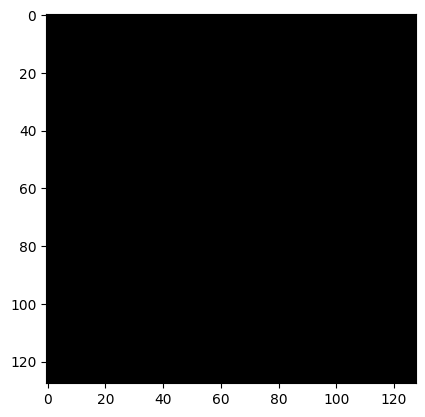

예측확률분포: [3.0431519e-03 9.9220575e-05 9.9678206e-01 4.4416905e-07 1.0619729e-06
 3.4656823e-06 1.1052230e-06 1.3576073e-05 4.7564599e-06 6.7261317e-06
 5.3311342e-06 7.6129919e-07 3.2868511e-06 6.1533674e-06 2.1379444e-06
 3.5788098e-06 6.5069789e-06 1.1716127e-05 1.5333912e-06 3.3176477e-06]
라벨: 0, 예측결과: 2


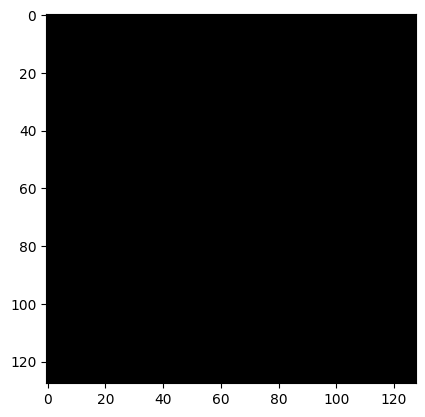

예측확률분포: [3.0431519e-03 9.9220575e-05 9.9678206e-01 4.4416905e-07 1.0619729e-06
 3.4656823e-06 1.1052230e-06 1.3576073e-05 4.7564599e-06 6.7261317e-06
 5.3311342e-06 7.6129919e-07 3.2868511e-06 6.1533674e-06 2.1379444e-06
 3.5788098e-06 6.5069789e-06 1.1716127e-05 1.5333912e-06 3.3176477e-06]
라벨: 0, 예측결과: 2


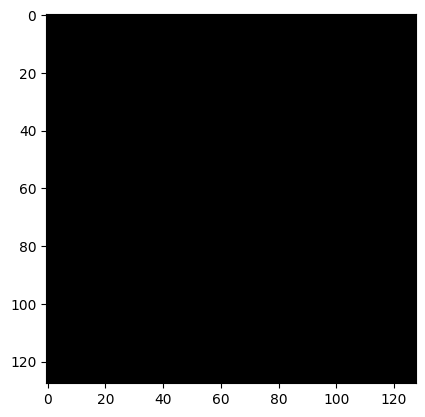

예측확률분포: [3.0431519e-03 9.9220575e-05 9.9678206e-01 4.4416905e-07 1.0619729e-06
 3.4656823e-06 1.1052230e-06 1.3576073e-05 4.7564599e-06 6.7261317e-06
 5.3311342e-06 7.6129919e-07 3.2868511e-06 6.1533674e-06 2.1379444e-06
 3.5788098e-06 6.5069789e-06 1.1716127e-05 1.5333912e-06 3.3176477e-06]
라벨: 0, 예측결과: 2


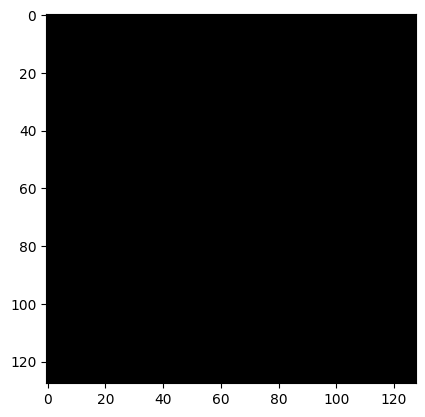

예측확률분포: [3.0431591e-03 9.9220764e-05 9.9678206e-01 4.4417033e-07 1.0619739e-06
 3.4656889e-06 1.1052251e-06 1.3576098e-05 4.7564690e-06 6.7261444e-06
 5.3311446e-06 7.6129993e-07 3.2868543e-06 6.1533792e-06 2.1379485e-06
 3.5788200e-06 6.5069912e-06 1.1716150e-05 1.5333941e-06 3.3176541e-06]
라벨: 0, 예측결과: 2


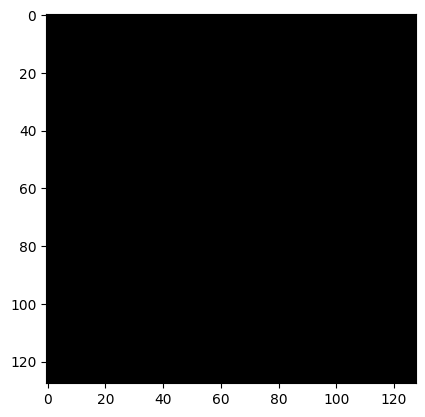

예측확률분포: [3.0431519e-03 9.9220575e-05 9.9678206e-01 4.4416905e-07 1.0619729e-06
 3.4656823e-06 1.1052230e-06 1.3576073e-05 4.7564599e-06 6.7261317e-06
 5.3311342e-06 7.6129919e-07 3.2868511e-06 6.1533674e-06 2.1379444e-06
 3.5788098e-06 6.5069789e-06 1.1716127e-05 1.5333912e-06 3.3176477e-06]
라벨: 0, 예측결과: 2


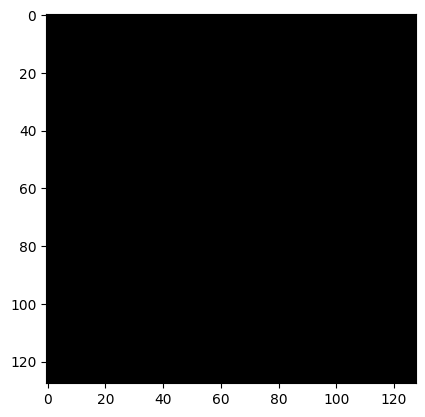

예측확률분포: [3.0431519e-03 9.9220575e-05 9.9678206e-01 4.4416905e-07 1.0619729e-06
 3.4656823e-06 1.1052230e-06 1.3576073e-05 4.7564599e-06 6.7261317e-06
 5.3311342e-06 7.6129919e-07 3.2868511e-06 6.1533674e-06 2.1379444e-06
 3.5788098e-06 6.5069789e-06 1.1716127e-05 1.5333912e-06 3.3176477e-06]
라벨: 0, 예측결과: 2


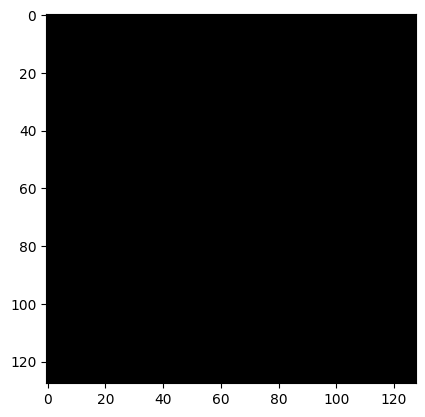

예측확률분포: [3.0431519e-03 9.9220575e-05 9.9678206e-01 4.4416905e-07 1.0619729e-06
 3.4656823e-06 1.1052230e-06 1.3576073e-05 4.7564599e-06 6.7261317e-06
 5.3311342e-06 7.6129919e-07 3.2868511e-06 6.1533674e-06 2.1379444e-06
 3.5788098e-06 6.5069789e-06 1.1716127e-05 1.5333912e-06 3.3176477e-06]
라벨: 0, 예측결과: 2


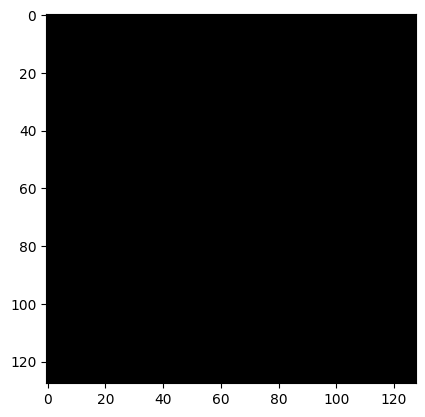

예측확률분포: [3.0431519e-03 9.9220575e-05 9.9678206e-01 4.4416905e-07 1.0619729e-06
 3.4656823e-06 1.1052230e-06 1.3576073e-05 4.7564599e-06 6.7261317e-06
 5.3311342e-06 7.6129919e-07 3.2868511e-06 6.1533674e-06 2.1379444e-06
 3.5788098e-06 6.5069789e-06 1.1716127e-05 1.5333912e-06 3.3176477e-06]
라벨: 0, 예측결과: 2


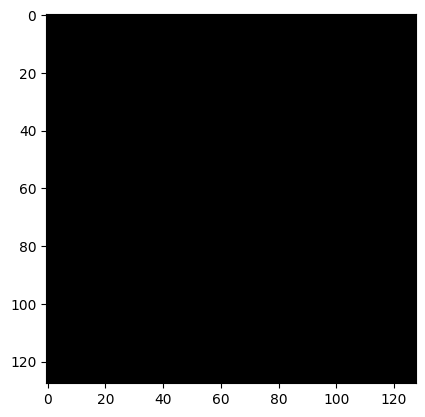

예측확률분포: [7.47658452e-03 9.18667972e-01 7.38554597e-02 1.19063075e-11
 7.48955742e-09 2.72316770e-11 2.83118702e-11 1.97004843e-10
 1.95860606e-10 1.05015293e-11 2.10471218e-09 3.54976493e-10
 7.02177205e-11 4.19984707e-11 9.43152667e-10 1.73451340e-11
 5.00154584e-09 9.18464593e-09 2.92056240e-11 4.77704751e-11]
라벨: 2, 예측결과: 1


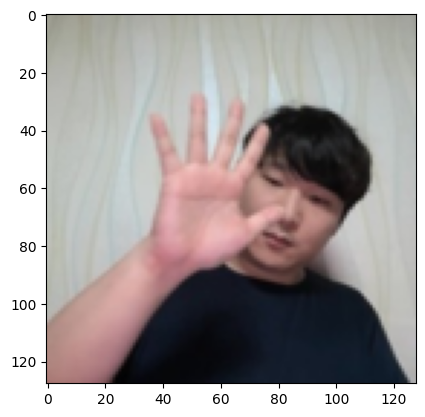

In [15]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
samples = random.choices(population=wrong_predict_list, k=10) # k값을 수정하면 더 많은 값의 수를 볼 수 있다.

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    # print(x_test[n])
    plt.show()